In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [6]:
import multihist as mh

In [7]:
!ls ../results/

archive		 emcee_restart16  emcee_restart4    nestle_restart18
emcee_restart0	 emcee_restart17  emcee_restart5    nestle_restart23
emcee_restart1	 emcee_restart18  emcee_restart6    nestle_restart26
emcee_restart10  emcee_restart19  emcee_restart7    nestle_restart27
emcee_restart11  emcee_restart2   emcee_restart8    nestle_restart33
emcee_restart12  emcee_restart20  emcee_restart9    nestle_restart35
emcee_restart13  emcee_restart21  nestle_restart13  nestle_restart4
emcee_restart14  emcee_restart22  nestle_restart16  nestle_restart7
emcee_restart15  emcee_restart3   nestle_restart17  nestle_restart8


In [8]:
# ??dddm.load_nestle_samples

In [9]:
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(
            "../../results/nestle_restart", i)
        print()
    except FileNotFoundError:
        pass
#         print(f"No result for {i}")
#     print()

load_nestle_samples::	loading results/../../results/nestle_restart4/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart7/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart8/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart13/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart16/
load_nest

In [10]:
results.keys()

dict_keys([4, 7, 8, 13, 16, 17, 18, 23, 26, 27, 33, 35])

In [11]:
selected_keys = []
for i in results.keys():
#     print(results[i]['config']['notes'])
#     if results[i]['res_dict']['nestle_nposterior'] < 1000:
#         print(results[i]['config']['notes'])
#     if 'nestle-extra_long' in results[i]['config']['notes']:
#         print(i, ",")
    if results[i]['config']['detector'] == "Ar":
#         path = "../results/nestle_restart" + str(i)
#         !rm -r $path
        selected_keys.append(i)
selected_keys

[]

---4---


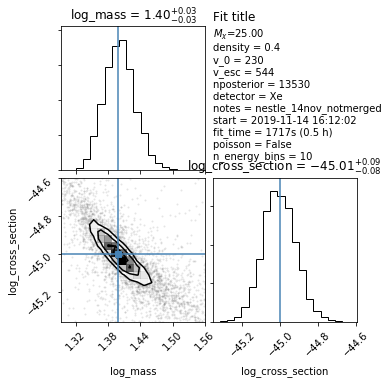

---7---


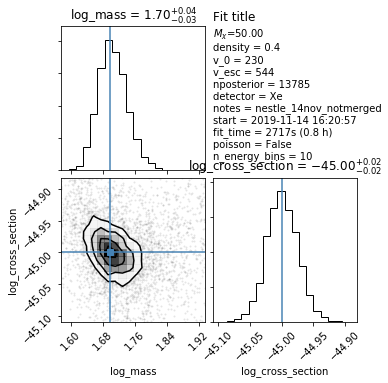

---8---


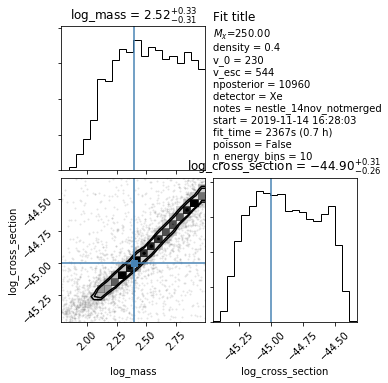

---13---


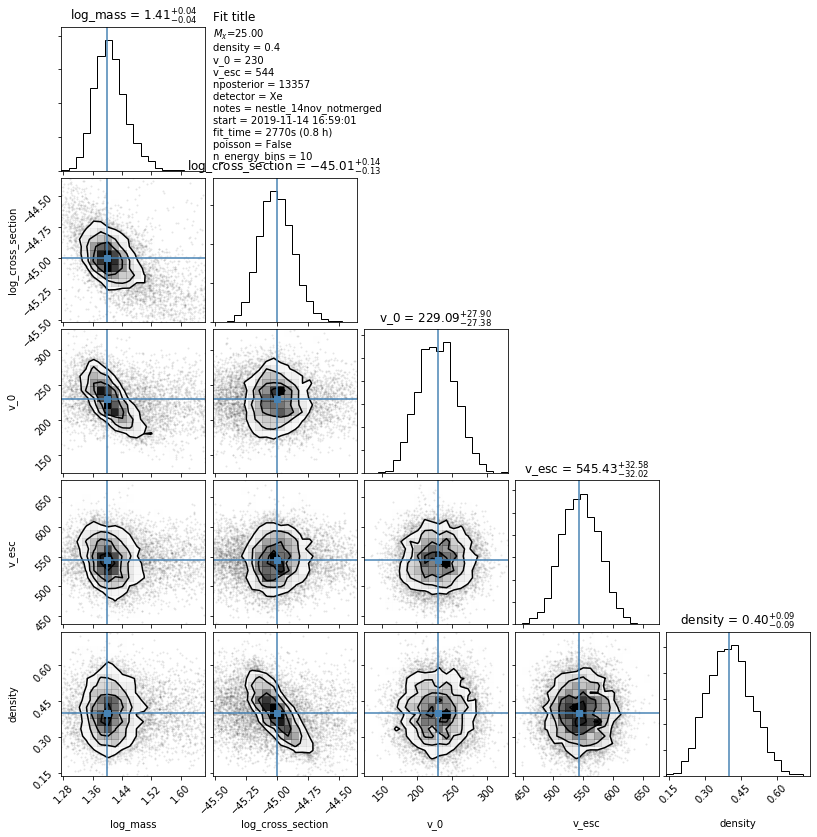

---16---


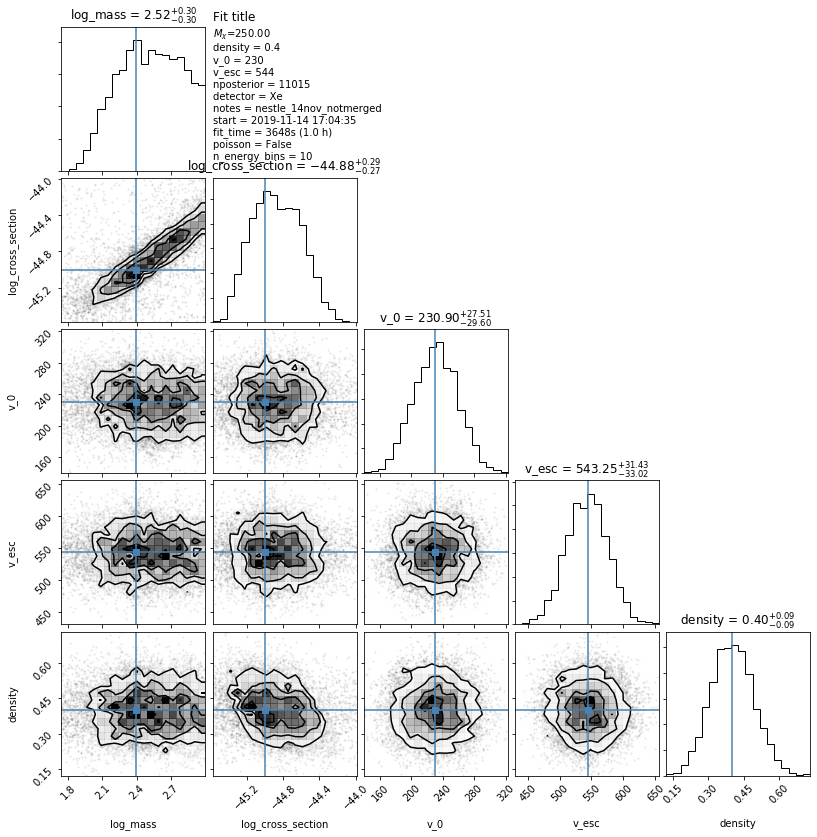

---17---


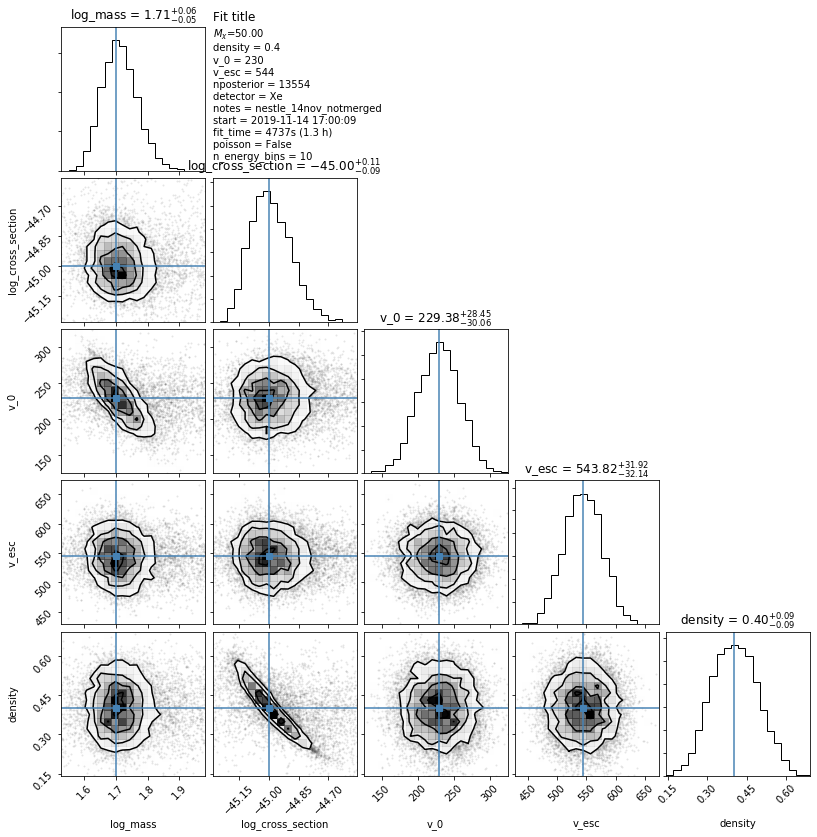

---18---


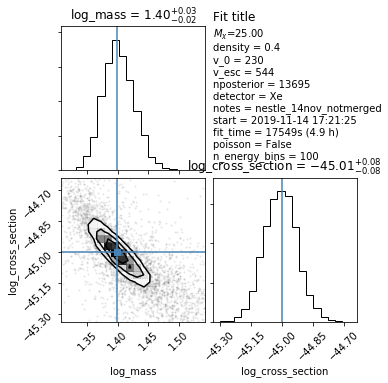

---23---


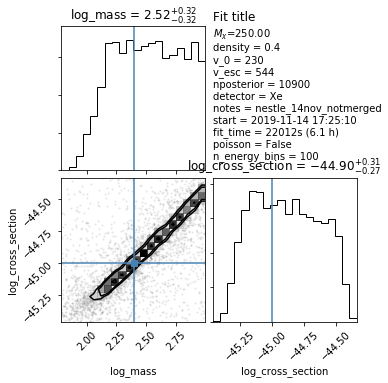

---26---


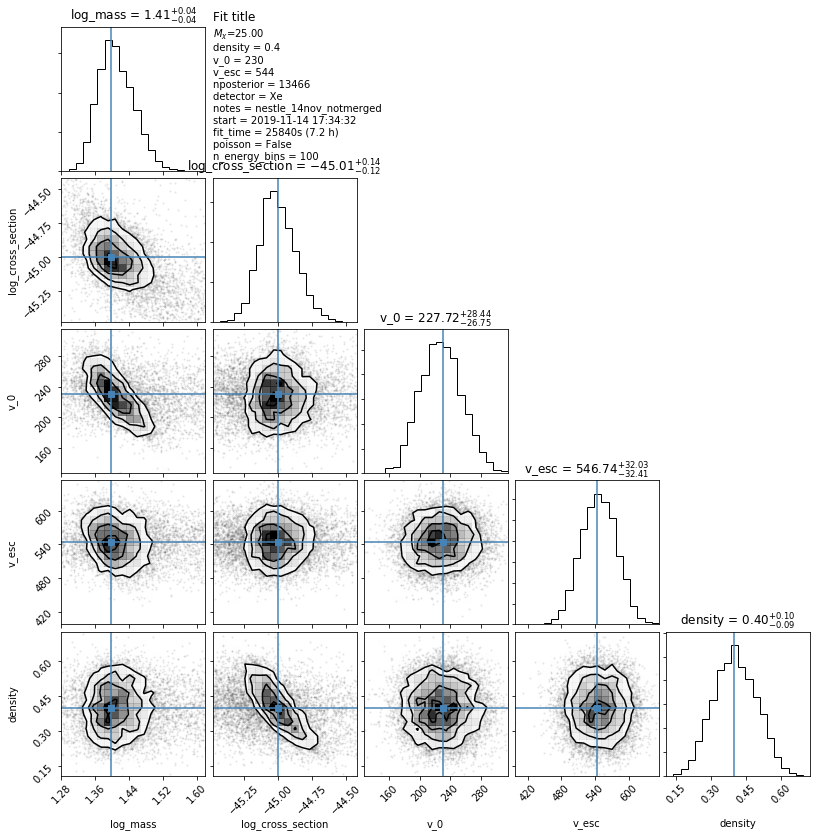

---27---


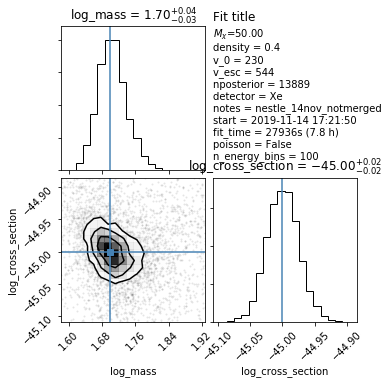

---33---


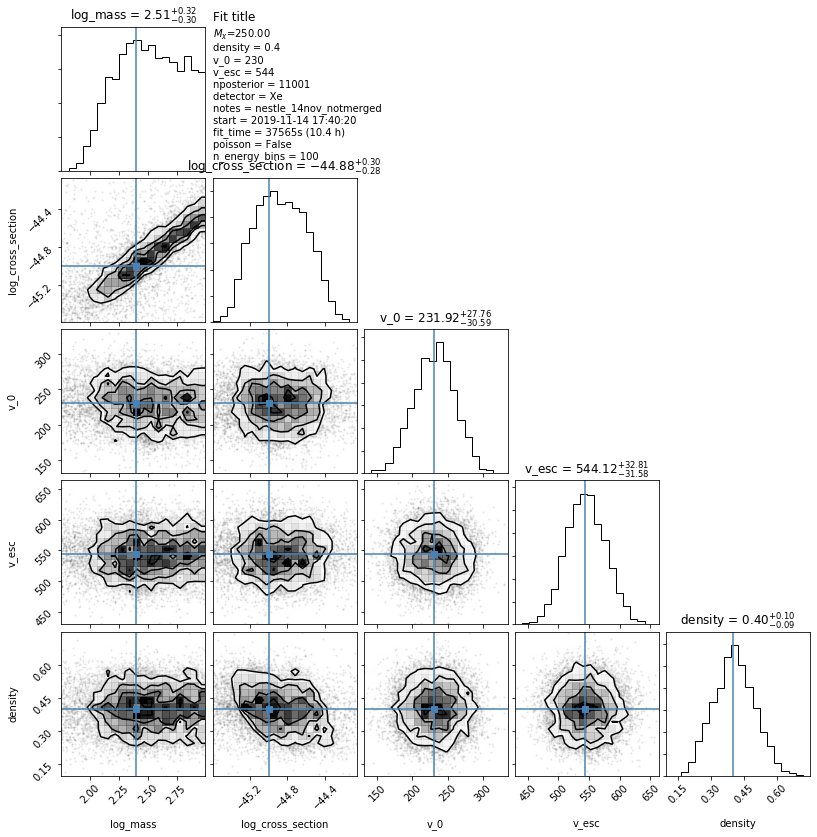

---35---


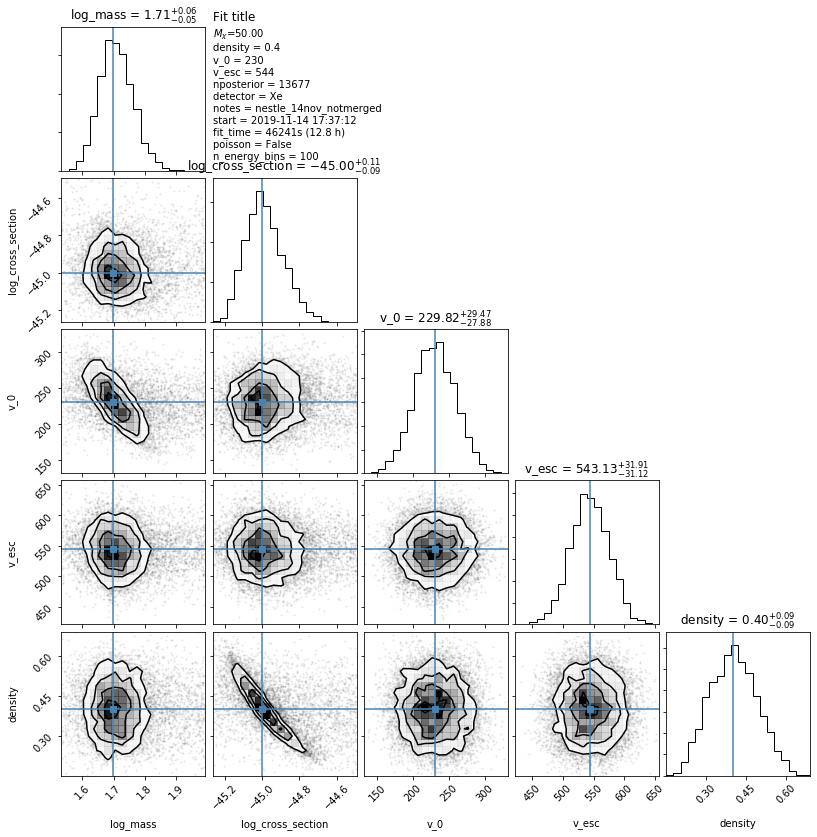

In [12]:
for key in results.keys():
# for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    dddm.nestle_corner(result)

---18---


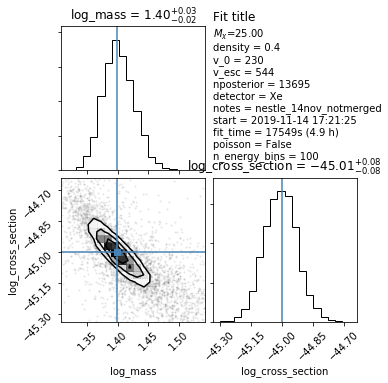

---23---


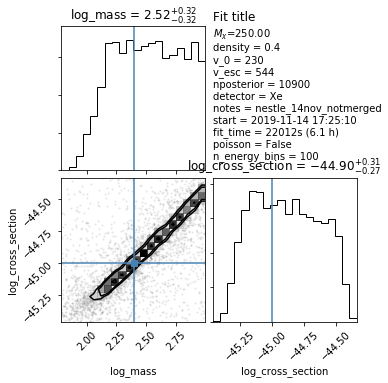

---26---


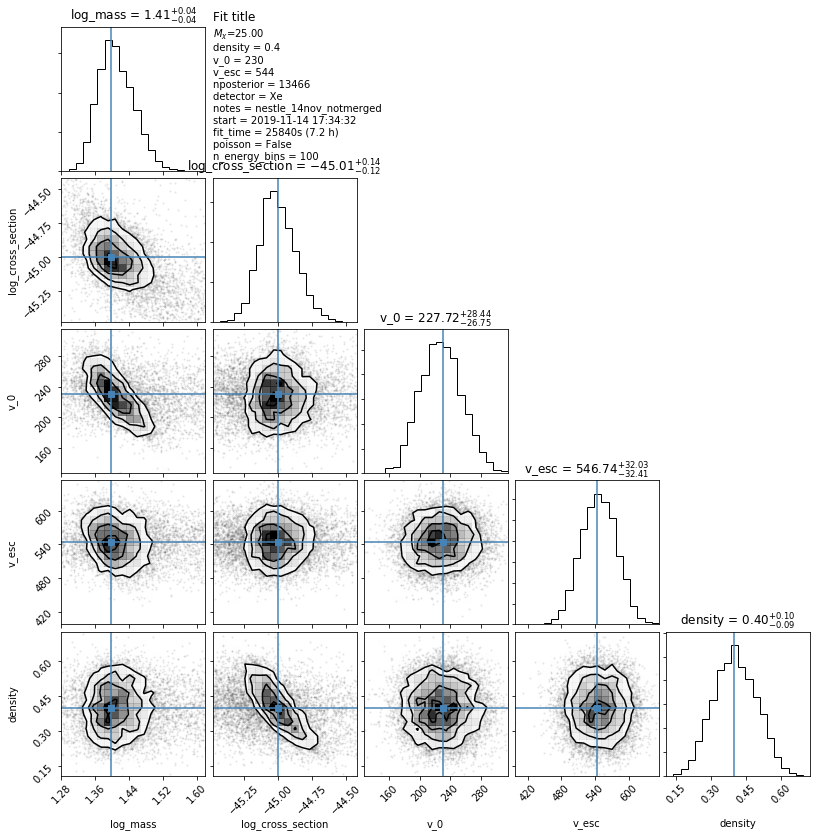

---27---


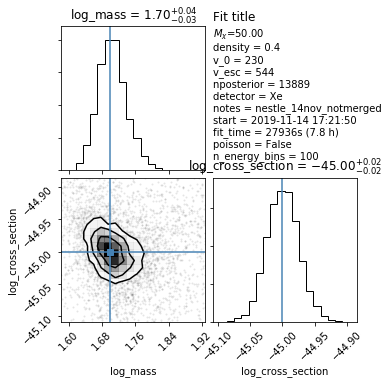

---33---


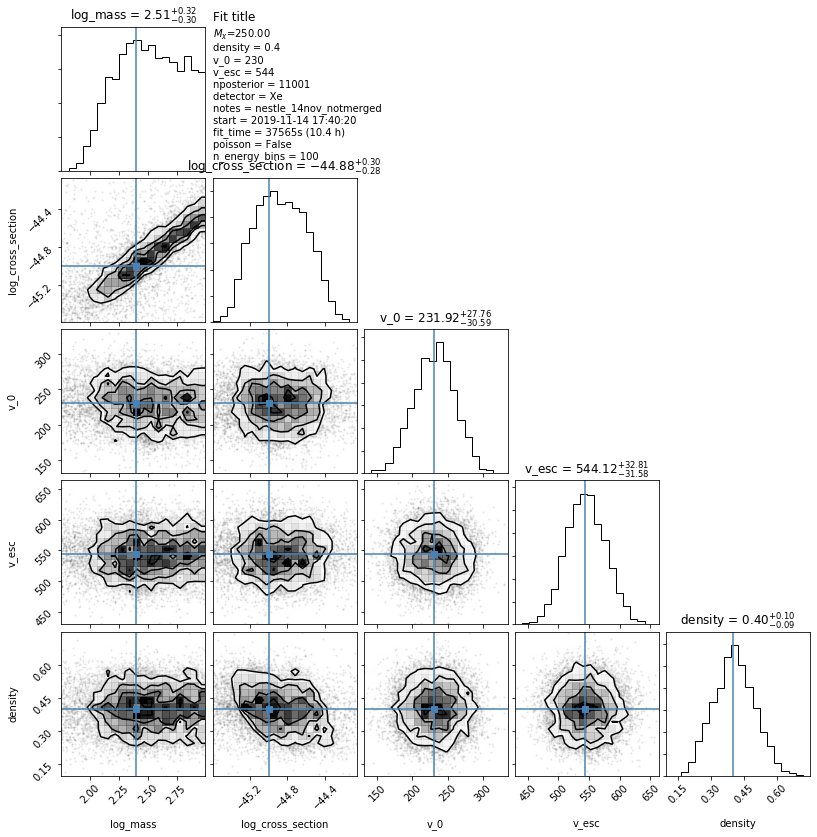

---35---


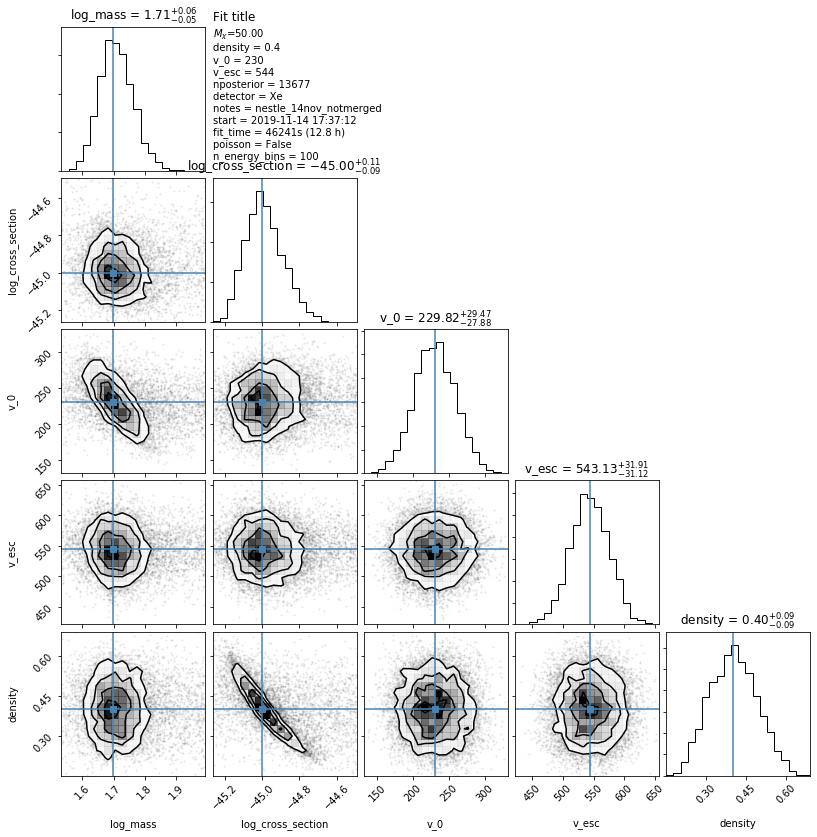

In [13]:
selected_keys = []
for i in results.keys():
#     print(results[i]['config']['notes'])
#     if results[i]['res_dict']['nestle_nposterior'] < 1000:
#         print(results[i]['config']['notes'])
#     if 'nestle-extra_long' in results[i]['config']['notes']:
#         print(i, ",")
    if results[i]['config']['n_energy_bins'] == 100:
        selected_keys.append(i)
selected_keys
# for key in results.keys():
for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    dddm.nestle_corner(result)

In [14]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [15]:
# np.shape(np.random.normal(1, 1, 10**6))


In [16]:
def show_combined_results(items):
    nbins = 45
    bin_range = [[1, 3], [-45.7, -44.3]]
    m2 = mh.Histdd(bins=nbins, range=bin_range, axis_names=['x', 'y'])
    for i in items:
        print(results[i]['config']['detector'])
        xbins, ybins = bin_range
        result = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
        counts, _, _ = np.histogram2d(*result, nbins, 
                                range = bin_range, normed = True) 
        cont = plt.contour(counts.T,
                extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                           linewidths=1, cmap = plt.cm.rainbow, 
                           levels = [5, 95])

        m2.add(*result)

    artists, labels = cont.legend_elements()
    plt.legend(artists, labels, handleheight=2, loc = "lower right")

    plt.axvline(np.log10(25), c = 'r')
    plt.axvline(np.log10(50), c = 'r')
    plt.axvline(np.log10(250), c = 'r')
    plt.axhline(-45, c = 'r')
#     m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
#     m2.plot(log_scale = True)

    plt.show()

In [17]:
items = [0,1,2]
show_combined_results(items)

KeyError: 0

In [ ]:
items = [0,3,4]
for item in items:
    show_combined_results([item])
show_combined_results(items)